<a href="https://colab.research.google.com/github/keyskull/COMPSCI-X433.3-Final-Project/blob/main/Introduction_python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project: Speech Analysis

#### Participants:  Jialin Li(Cullen), Alexa Huang

#### Date: 4/8/2021

#### Project Objective: 
- This project intended to analyze a speech audio file, using the specific packages of NumPy, Scipy, and Pylab for plotting data.



### Data Source:
- From OpenSLR. OpenSLR is a site devoted to hosting speech and language resources, such as training corpora for speech recognition, and software related to speech recognition. 
- We used the data of LibriSpeech ASR corpus, Large-scale (1000 hours) corpus of read English speech from OpenSLR

In [ ]:
!wget -O dev-clean.tar.gz https://www.openslr.org/resources/12/dev-clean.tar.gz
!tar -xvzf dev-clean.tar.gz

### Import Packages

In [3]:
import numpy as np
import scipy as sp
import pylab as plb
import soundfile as sf                                                      
from IPython.display import Audio
from scipy.io import wavfile
import seaborn as sns


In [4]:
# loading audio file
path = 'LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac'
data, samplerate = sf.read(path)
time = len(data)/samplerate    
print('Sample rate: %s Hz' % samplerate)    
print('Total time:',len(data)/samplerate,'s')     
Audio(data,rate=samplerate)

Sample rate: 16000 Hz
Total time: 5.855 s


In [5]:
print('Data Strucure:')
data

Data Strucure:


array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ])

In [ ]:
# Choosing area
# data = data[int(len(data)/4): int(len(data)/4*3)]
data = data
time = len(data)/samplerate    
Audio(data,rate=samplerate)

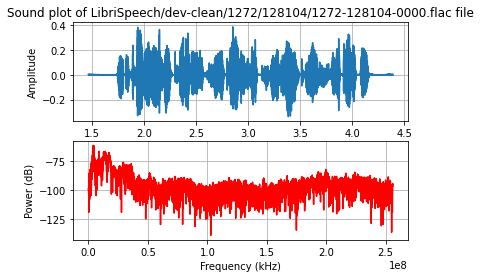

In [ ]:
# Ploting data
t = plb.linspace(time/4,time/4*3,len(data))
plb.subplot(2,1,1)
plb.title('Sound plot of %s file' % path)
plb.plot(t,data)
plb.xlabel('time')
plb.ylabel('Amplitude')
plb.axis('tight')
plb.grid(True)

Freqs = np.arange(0,samplerate,2) * samplerate
sig_pow = (abs(sp.fft.fft(data,samplerate)) / len(data)) ** 2
sig_pow= sig_pow[0:int(len(sig_pow)/2)]
plb.subplot(2,1,2)
plb.plot(Freqs,10*np.log10(sig_pow),color='r')
plb.xlabel('Frequency (kHz)')
plb.ylabel('Power (dB)')
plb.axis('tight')
plb.grid(True)
plb.show()

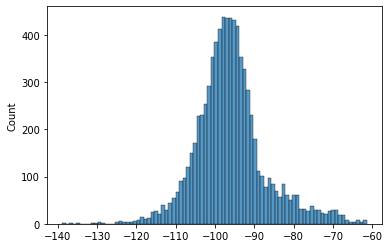

In [ ]:
sns.histplot(10*np.log10(sig_pow))

In [ ]:
# Resampling
F = samplerate / 2
F, s = F.as_integer_ratio()
x2= data[0:len(data):2]
Audio(x2,rate=F)

In [ ]:
Audio(data,rate=samplerate)

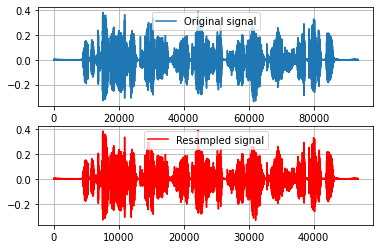

In [ ]:
plb.subplot(2,1,1)
plb.plot(data,label='Original signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.subplot(2,1,2)
plb.plot(x2,'r',label='Resampled signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()

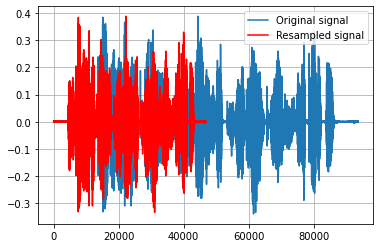

In [ ]:
plb.plot(data,label='Original signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.plot(x2,'r',label='Resampled signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()

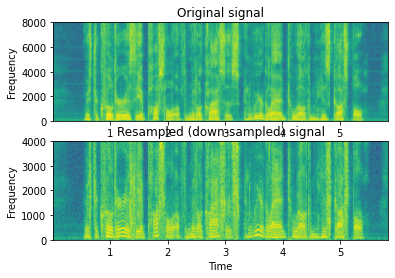

In [ ]:
plb.figure()
plb.subplot(2,1,1)
plb.specgram(data,Fs=samplerate)
plb.axis('tight')
plb.title('Original signal')
plb.ylabel('Frequency')
plb.subplot(2,1,2)
plb.specgram(x2,Fs=F)
plb.axis('tight')
plb.title('Resampled (down-sampled) signal')
plb.xlabel('Time')
plb.ylabel('Frequency')
plb.show()

### aduio motification

In [ ]:
# Time domain manipulations
Audio(data,rate=samplerate)

In [ ]:
# Speed down voice
Audio(data,rate=samplerate*0.5)

In [ ]:
# Speed up voice
Audio(data,rate=samplerate*1.2)